In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
sns.set()

In [116]:
#データの読み込み

lunch_train_data = pd.read_csv("train.csv")
lunch_test_data = pd.read_csv("test.csv")

In [117]:
print("trainデータの大きさ",lunch_train_data.shape)
print("testデータの大きさ",lunch_test_data.shape)

trainデータの大きさ (207, 12)
testデータの大きさ (40, 11)


In [118]:
#カラム名
lunch_train_data.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [119]:
#datatype
lunch_train_data.dtypes

datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object

In [120]:
#各カラムの欠損数
lunch_train_data.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

欠損値  
kcal：カロリー  
remarks：特記事項  
event：社内イベント  
payday：給料日フラグ  


In [121]:
lunch_train_data.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


# 販売数の推移

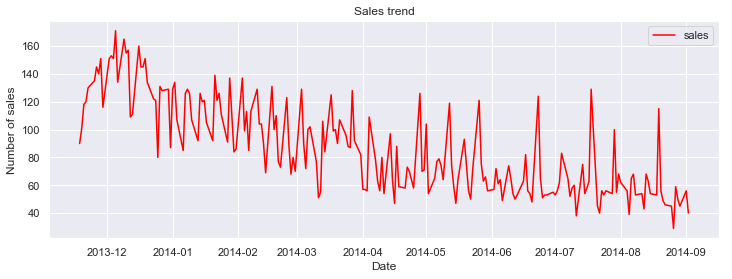

In [122]:
#販売数の推移

x1 = pd.date_range('2013-11-18 00:00:00',periods=207,freq='B')
#x2 = pd.date_range('2014-10-01 00:00:00',periods=40,freq='B')

plt.figure(figsize=(12,4))
plt.plot(x1,lunch_train_data["y"],label="sales",c = "red")

plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()


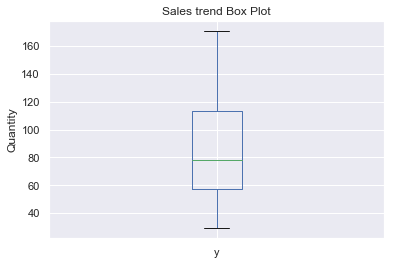

In [123]:
lunch_train_data["y"].plot.box()
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

In [124]:
lunch_train_data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


# 説明変数

気温

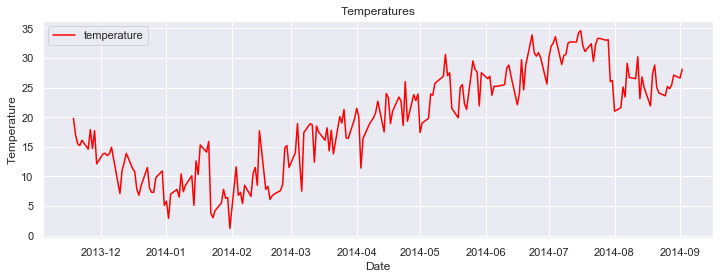

In [125]:
#販売数の推移

x1 = pd.date_range('2013-11-18 00:00:00',periods=207,freq='B')
#x2 = pd.date_range('2014-10-01 00:00:00',periods=40,freq='B')

plt.figure(figsize=(12,4))
plt.plot(x1,lunch_train_data["temperature"],label="temperature",c = "red")

plt.title("Temperatures")
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.legend()


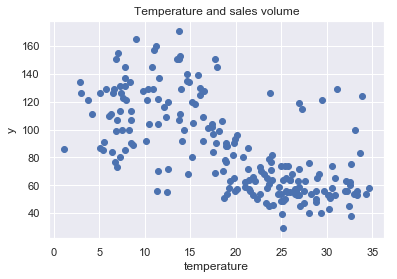

In [126]:
#散布図の作成
plt.scatter(lunch_train_data["temperature"],lunch_train_data["y"])
plt.xlabel("temperature")
plt.ylabel("y")
plt.title("Temperature and sales volume")
plt.show()

In [127]:
#相関
print("相関係数：",lunch_train_data["temperature"].corr(lunch_train_data["y"])
)

相関係数： -0.6553321917313495


object型

1:datetime

In [128]:
lunch_train_data["month"] = 0
date = lunch_train_data["datetime"]
maxs = date.size
print(maxs)
for i in range(0,maxs):
    lunch_train_data["month"][i] = int(date[i][5:7].replace("-",""))
print("month: ",lunch_train_data["month"].unique())

207
month:  [11 12  1  2  3  4  5  6  7  8  9]


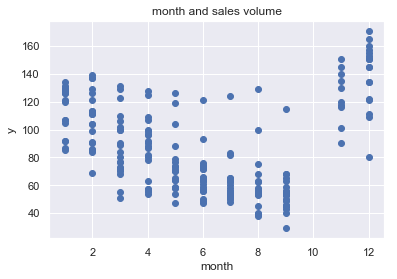

In [129]:
#散布図の作成
plt.scatter(lunch_train_data["month"],lunch_train_data["y"])
plt.xlabel("month")
plt.ylabel("y")
plt.title("month and sales volume")
plt.show()

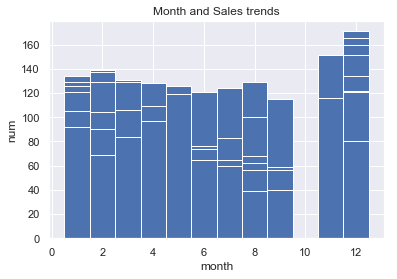

In [130]:
plt.bar(lunch_train_data["month"],lunch_train_data["y"],width=1.0,align="center")
plt.xlabel("month")
plt.ylabel("num")
plt.title("Month and Sales trends")
plt.grid(True)
plt.show()

In [131]:
from mpl_toolkits.mplot3d import Axes3D

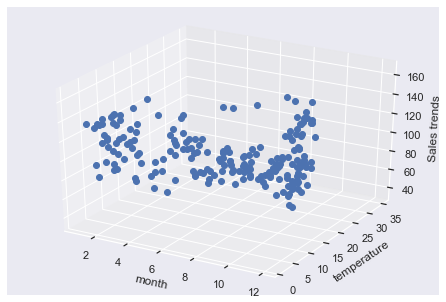

In [136]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("month")
ax.set_ylabel("temperature")
ax.set_zlabel("Sales trends")

X = lunch_train_data["month"]
Y = lunch_train_data["temperature"]
Z = lunch_train_data["y"]
ax.plot(X, Y, Z,marker="o",linestyle='None')

plt.show()

月と気温

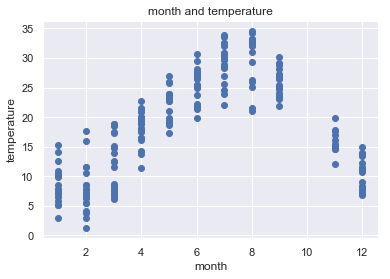

In [133]:
#散布図の作成
plt.scatter(lunch_train_data["month"],lunch_train_data["temperature"])
plt.xlabel("month")
plt.ylabel("temperature")
plt.title("month and temperature")
plt.show()

2:week

In [176]:
#曜日の種類
print("kind of week :",lunch_train_data["week"].unique())
lunch_train_data.loc[lunch_train_data["week"] == "月","week"] = "M"
lunch_train_data.loc[lunch_train_data["week"] == "火","week"] = "Tu"
lunch_train_data.loc[lunch_train_data["week"] == "水","week"] = "W"
lunch_train_data.loc[lunch_train_data["week"] == "木","week"] = "Th"
lunch_train_data.loc[lunch_train_data["week"] == "金","week"] = "F"
#lunch_train_data[lunch_train_data["week"] == "月"]["week"] = "M"

kind of week : ['M' '火' '水' '木' '金']


In [177]:
lunch_train_data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month
0,2013-11-18,90,M,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11
1,2013-11-19,101,Tu,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11
2,2013-11-20,118,W,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11
3,2013-11-21,120,Th,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11
4,2013-11-22,130,F,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11


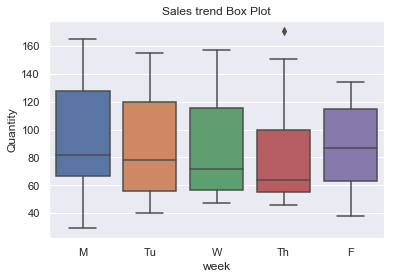

In [178]:
sns.boxplot(lunch_train_data["week"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

・気温が低いと弁当が多く売れる  
・気温が低いのは11月～2月当たりでこの辺は弁当の売り上げ数が多い  
・季節で弁当の売り上げが変動する